In [25]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
import re

In [26]:
t0_end_ = 1.0
t0_start = 0.0
t10_end_ = 198.0
t10_start = 106.0
t11_end_ = 203.0
t11_start = 198.0
t12_end_ = 208.0
t12_start = 208.0
t13_end_ = 216.0
t13_start = 209.0
t14_end_ = 209.0
t14_start = 208.0
t15_end_ = 216.0
t15_start = 216.0
t16_end_ = 249.0
t16_start = 216.0
t17_end_ = 247.0
t17_start = 246.0
t18_end_ = 249.0
t18_start = 247.0
t19_end_ = 242.0
t19_start = 241.0
t1_end_ = 5.0
t1_start = 1.0
t20_end_ = 244.0
t20_start = 242.0
t21_end_ = 246.0
t21_start = 244.0
t22_end_ = 240.0
t22_start = 239.0
t23_end_ = 241.0
t23_start = 240.0
t24_end_ = 249.0
t24_start = 249.0
t25_end_ = 260.0
t25_start = 259.0
t26_end_ = 257.0
t26_start = 256.0
t27_end_ = 259.0
t27_start = 257.0
t28_end_ = 252.0
t28_start = 251.0
t29_end_ = 254.0
t29_start = 252.0
t2_end_ = 12.0
t2_start = 5.0
t30_end_ = 256.0
t30_start = 254.0
t31_end_ = 250.0
t31_start = 249.0
t32_end_ = 251.0
t32_start = 250.0
t33_end_ = 260.0
t33_start = 260.0
t34_end_ = 293.0
t34_start = 260.0
t35_end_ = 291.0
t35_start = 290.0
t36_end_ = 293.0
t36_start = 291.0
t37_end_ = 286.0
t37_start = 285.0
t38_end_ = 288.0
t38_start = 286.0
t39_end_ = 290.0
t39_start = 288.0
t3_end_ = 102.0
t3_start = 12.0
t40_end_ = 284.0
t40_start = 283.0
t41_end_ = 285.0
t41_start = 284.0
t42_end_ = 293.0
t42_start = 293.0
t43_end_ = 304.0
t43_start = 303.0
t44_end_ = 301.0
t44_start = 300.0
t45_end_ = 303.0
t45_start = 301.0
t46_end_ = 296.0
t46_start = 295.0
t47_end_ = 298.0
t47_start = 296.0
t48_end_ = 300.0
t48_start = 298.0
t49_end_ = 294.0
t49_start = 293.0
t4_end_ = 102.0
t4_start = 97.0
t50_end_ = 295.0
t50_start = 294.0
t51_end_ = 304.0
t51_start = 304.0
t52_end_ = 341.0
t52_start = 304.0
t53_end_ = 307.0
t53_start = 305.0
t54_end_ = 315.0
t54_start = 307.0
t55_end_ = 318.0
t55_start = 315.0
t56_end_ = 305.0
t56_start = 304.0
t57_end_ = 341.0
t57_start = 341.0
t58_end_ = 374.0
t58_start = 372.0
t59_end_ = 368.0
t59_start = 367.0
t5_end_ = 102.0
t5_start = 102.0
t60_end_ = 370.0
t60_start = 368.0
t61_end_ = 372.0
t61_start = 370.0
t62_end_ = 342.0
t62_start = 341.0
t63_end_ = 344.0
t63_start = 342.0
t64_end_ = 363.0
t64_start = 344.0
t65_end_ = 365.0
t65_start = 363.0
t66_end_ = 367.0
t66_start = 365.0
t67_end_ = 342.0
t67_start = 341.0
t68_end_ = 343.0
t68_start = 342.0
t69_end_ = 375.0
t69_start = 374.0
t6_end_ = 192.0
t6_start = 102.0
t7_end_ = 208.0
t7_start = 203.0
t8_end_ = 103.0
t8_start = 102.0
t9_end_ = 106.0
t9_start = 103.0

In [27]:
# Extract task data from the variables and create a structured dataset
def extract_task_data():
    # Get all variables from the current namespace
    variables = globals()
    
    # Extract task numbers, start times, and end times
    tasks = {}
    
    for var_name, value in variables.items():
        if var_name.startswith('t') and ('_start' in var_name or '_end_' in var_name):
            # Extract task number
            match = re.match(r't(\d+)_(start|end_)', var_name)
            if match:
                task_num = int(match.group(1))
                time_type = match.group(2)
                
                if task_num not in tasks:
                    tasks[task_num] = {}
                
                if time_type == 'start':
                    tasks[task_num]['start'] = value
                else:  # end_
                    tasks[task_num]['end'] = value
    
    # Convert to list of dictionaries
    task_list = []
    for task_num in sorted(tasks.keys()):
        if 'start' in tasks[task_num] and 'end' in tasks[task_num]:
            task_list.append({
                'Task': f'Task {task_num}',
                'Start': tasks[task_num]['start'],
                'End': tasks[task_num]['end'],
                'Duration': tasks[task_num]['end'] - tasks[task_num]['start']
            })
    
    return task_list

# Create the dataset
task_data = extract_task_data()

# Create DataFrame
df = pd.DataFrame(task_data)

# Display the first few rows
print("Task Data Summary:")
print(df.head(10))
print(f"\nTotal tasks: {len(df)}")
print(f"Timeline: {df['Start'].min()} to {df['End'].max()}")
print(f"Total duration: {df['End'].max() - df['Start'].min()}")

Task Data Summary:
     Task  Start    End  Duration
0  Task 0    0.0    1.0       1.0
1  Task 1    1.0    5.0       4.0
2  Task 2    5.0   12.0       7.0
3  Task 3   12.0  102.0      90.0
4  Task 4   97.0  102.0       5.0
5  Task 5  102.0  102.0       0.0
6  Task 6  102.0  192.0      90.0
7  Task 7  203.0  208.0       5.0
8  Task 8  102.0  103.0       1.0
9  Task 9  103.0  106.0       3.0

Total tasks: 70
Timeline: 0.0 to 375.0
Total duration: 375.0


In [28]:
# Create Gantt chart using plotly
fig = go.Figure()

# Add bars for each task
for i, row in df.iterrows():
    fig.add_trace(go.Bar(
        name=row['Task'],
        x=[row['Duration']],
        y=[row['Task']],
        base=[row['Start']],
        orientation='h',
        marker_color=px.colors.qualitative.Set3[i % len(px.colors.qualitative.Set3)],
        text=f"Duration: {row['Duration']:.1f}",
        textposition='inside',
        hovertemplate=(
            f"<b>{row['Task']}</b><br>" +
            f"Start: {row['Start']:.1f}<br>" +
            f"End: {row['End']:.1f}<br>" +
            f"Duration: {row['Duration']:.1f}<br>" +
            "<extra></extra>"
        )
    ))

# Update layout
fig.update_layout(
    title="Task Schedule Gantt Chart",
    xaxis_title="Time",
    yaxis_title="Tasks",
    showlegend=False,
    height=max(600, len(df) * 25),  # Adjust height based on number of tasks
    bargap=0.2,
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        categoryorder='array',
        categoryarray=[f'Task {i}' for i in sorted(df.index)]
    )
)

# Show the chart
fig.show()

# Print some statistics
print(f"Longest task: {df.loc[df['Duration'].idxmax(), 'Task']} (Duration: {df['Duration'].max():.1f})")
print(f"Shortest task: {df.loc[df['Duration'].idxmin(), 'Task']} (Duration: {df['Duration'].min():.1f})")
print(f"Average task duration: {df['Duration'].mean():.1f}")

Longest task: Task 10 (Duration: 92.0)
Shortest task: Task 5 (Duration: 0.0)
Average task duration: 7.2


In [29]:
# Save data in different formats
import json
import os

# Create output directory if it doesn't exist
output_dir = "gantt_output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save as CSV
csv_path = os.path.join(output_dir, "task_schedule.csv")
df.to_csv(csv_path, index=False)
print(f"Data saved as CSV: {csv_path}")

# Save as JSON
json_path = os.path.join(output_dir, "task_schedule.json")
df.to_json(json_path, orient='records', indent=2)
print(f"Data saved as JSON: {json_path}")

# Save as Excel (if openpyxl is available)
try:
    excel_path = os.path.join(output_dir, "task_schedule.xlsx")
    df.to_excel(excel_path, index=False)
    print(f"Data saved as Excel: {excel_path}")
except ImportError:
    print("openpyxl not available, Excel export skipped")

# Save the Gantt chart as HTML
html_path = os.path.join(output_dir, "gantt_chart.html")
fig.write_html(html_path)
print(f"Gantt chart saved as HTML: {html_path}")

# Display the data structure
print("\nData structure:")
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head())

Data saved as CSV: gantt_output/task_schedule.csv
Data saved as JSON: gantt_output/task_schedule.json
openpyxl not available, Excel export skipped
Gantt chart saved as HTML: gantt_output/gantt_chart.html

Data structure:
Task         object
Start       float64
End         float64
Duration    float64
dtype: object

First 5 rows:
     Task  Start    End  Duration
0  Task 0    0.0    1.0       1.0
1  Task 1    1.0    5.0       4.0
2  Task 2    5.0   12.0       7.0
3  Task 3   12.0  102.0      90.0
4  Task 4   97.0  102.0       5.0


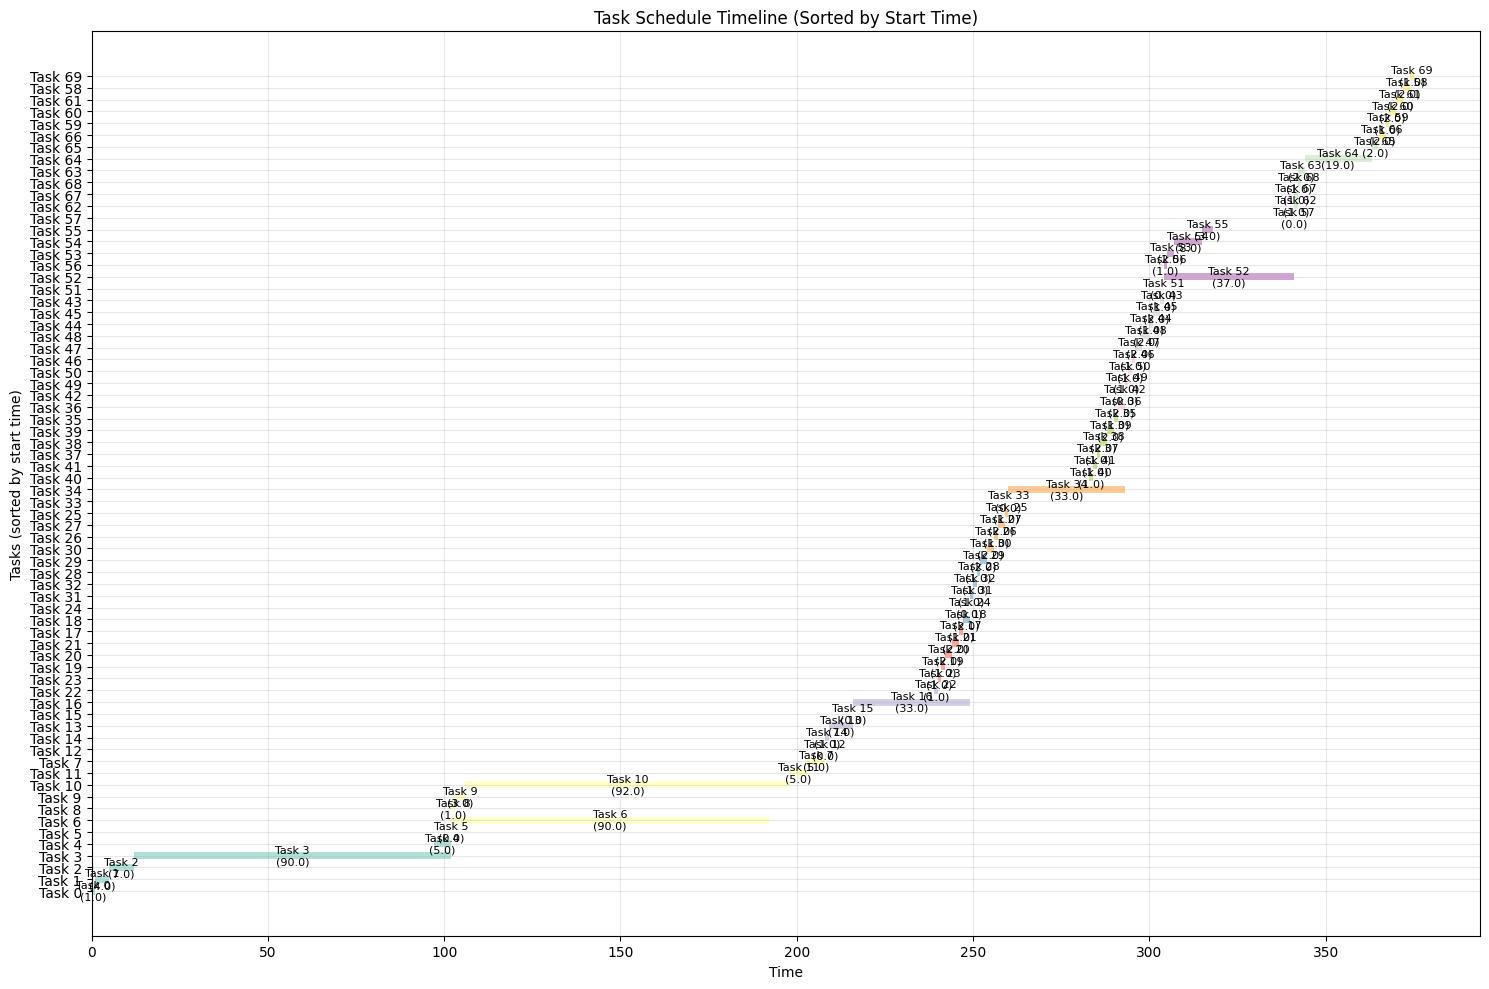

Task Overlap Analysis:
Found 24 task overlaps:
      Task1    Task2  Overlap_Duration  Overlap_Start  Overlap_End
3    Task 6  Task 10              86.0          106.0        192.0
19  Task 52  Task 54               8.0          307.0        315.0
0    Task 3   Task 4               5.0           97.0        102.0
2    Task 6   Task 9               3.0          103.0        106.0
20  Task 52  Task 55               3.0          315.0        318.0
8   Task 16  Task 21               2.0          244.0        246.0
7   Task 16  Task 20               2.0          242.0        244.0
5   Task 16  Task 18               2.0          247.0        249.0
14  Task 34  Task 38               2.0          286.0        288.0
18  Task 52  Task 53               2.0          305.0        307.0
12  Task 34  Task 36               2.0          291.0        293.0
15  Task 34  Task 39               2.0          288.0        290.0
6   Task 16  Task 19               1.0          241.0        242.0
4   Task 16  Ta

In [30]:
# Create a timeline view and analyze task overlaps
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Create a timeline plot using matplotlib
fig, ax = plt.subplots(figsize=(15, 10))

# Sort tasks by start time for better visualization
df_sorted = df.sort_values('Start')

# Create color map
colors = plt.cm.Set3(np.linspace(0, 1, len(df_sorted)))

# Plot each task as a horizontal bar
for i, (idx, row) in enumerate(df_sorted.iterrows()):
    ax.barh(i, row['Duration'], left=row['Start'], 
            color=colors[i], alpha=0.7, height=0.6)
    
    # Add task labels
    ax.text(row['Start'] + row['Duration']/2, i, 
            f"{row['Task']}\n({row['Duration']:.1f})", 
            ha='center', va='center', fontsize=8)

# Customize the plot
ax.set_xlabel('Time')
ax.set_ylabel('Tasks (sorted by start time)')
ax.set_title('Task Schedule Timeline (Sorted by Start Time)')
ax.set_yticks(range(len(df_sorted)))
ax.set_yticklabels([f"{row['Task']}" for _, row in df_sorted.iterrows()])
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze task overlaps
print("Task Overlap Analysis:")
print("=" * 50)

overlaps = []
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i < j:  # Avoid duplicate comparisons
            # Check if tasks overlap
            if (row1['Start'] < row2['End'] and row2['Start'] < row1['End']):
                overlap_start = max(row1['Start'], row2['Start'])
                overlap_end = min(row1['End'], row2['End'])
                overlap_duration = overlap_end - overlap_start
                overlaps.append({
                    'Task1': row1['Task'],
                    'Task2': row2['Task'],
                    'Overlap_Duration': overlap_duration,
                    'Overlap_Start': overlap_start,
                    'Overlap_End': overlap_end
                })

if overlaps:
    overlap_df = pd.DataFrame(overlaps)
    print(f"Found {len(overlaps)} task overlaps:")
    print(overlap_df.sort_values('Overlap_Duration', ascending=False))
    
    # Save overlaps analysis
    overlap_path = os.path.join(output_dir, "task_overlaps.csv")
    overlap_df.to_csv(overlap_path, index=False)
    print(f"\nOverlap analysis saved to: {overlap_path}")
else:
    print("No task overlaps found - all tasks are sequential")